In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import gdown
import rarfile
import os

# Correct URL after permissions are updated
url = 'https://drive.google.com/uc?id=1ObO-pLyN4vVmL7tGW3RrkciDlnnGU2qX'
output_rar = '/content/Wheat.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Check if the downloaded file is valid before extracting
if os.path.exists(output_rar):
    try:
        # Try to open the downloaded file as a RAR file
        with rarfile.RarFile(output_rar, 'r') as rar_ref:
            rar_ref.extractall('/content')
        print("File extracted successfully!")
    except rarfile.NotRarFile:
        print("Error: The downloaded file is not a valid RAR archive.")
else:
    print("Error: File not found.")

Downloading...
From (original): https://drive.google.com/uc?id=1ObO-pLyN4vVmL7tGW3RrkciDlnnGU2qX
From (redirected): https://drive.google.com/uc?id=1ObO-pLyN4vVmL7tGW3RrkciDlnnGU2qX&confirm=t&uuid=5c372152-80fe-46a3-a872-232eee3622f0
To: /content/Wheat.rar
100%|██████████| 234M/234M [00:04<00:00, 52.4MB/s]


File extracted successfully!


In [4]:
# Path to the extracted dataset folder

dataset = '/content/Wheat'

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,714 (16.36 MB)

 Trainable params: 4,266,826 (16.28 MB)

 Non-trainable params: 21,888 (85.50 KB)

Found 2042 images belonging to 3 classes.
Found 293 images belonging to 3 classes.
Found 594 images belonging to 3 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 434ms/step - accuracy: 0.5210 - loss: 1.1125 - val_accuracy: 0.3413 - val_loss: 1.5954
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.6861 - loss: 0.7259 - val_accuracy: 0.3413 - val_loss: 1.3501
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.7777 - loss: 0.5558 - val_accuracy: 0.3413 - val_loss: 1.4947
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.7870 - loss: 0.4951 - val_accuracy: 0.3311 - val_loss: 1.6939
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8391 - loss: 0.3918 - val_accuracy: 0.3311 - val_loss: 1.9614
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.8940 - loss: 0.3013 - val_accuracy: 0.3311 - val_loss: 2.8659
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8964 - loss: 0.2624 - val_accuracy: 0.3311 - val_loss: 4.0728
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.9326 - loss: 0.1825 - val_accuracy: 0.3311 

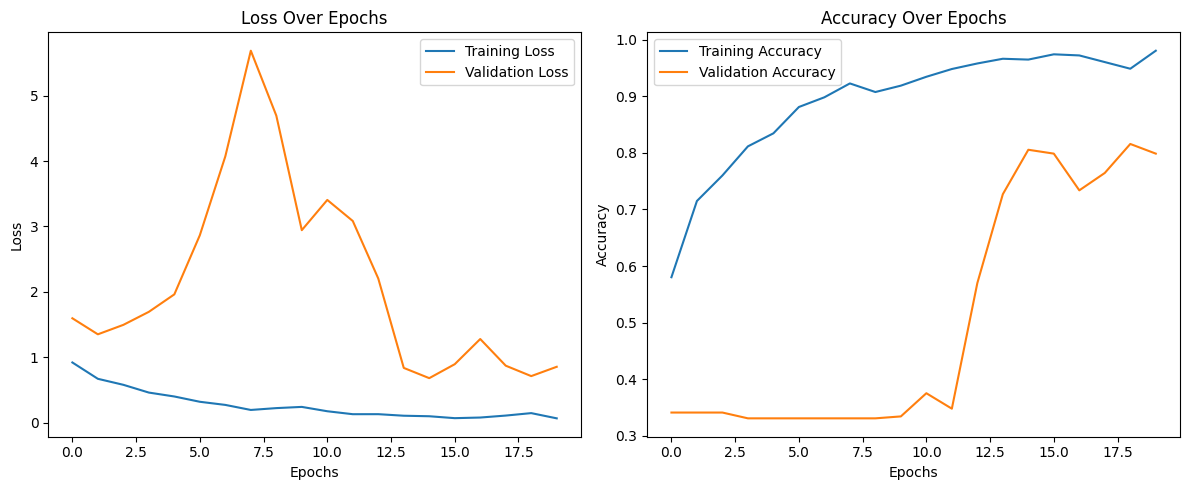

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step

Performance on Test Data
Precision: 0.8279627001141936
Recall: 0.7828282828282829
F1 Score: 0.763163118512229
Accuracy: 0.7828282828282829
Confusion Matrix:
              Brown_Rust  Healthy  Yellow_Rust
Brown_Rust          183       12            1
Healthy               6      191            0
Yellow_Rust          52       58           91


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Directory for the dataset
data_dir = dataset

# Load InceptionV3 with pre-trained ImageNet weights, excluding the top layers
base_model = MobileNet(weights=None, include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent training them
base_model.trainable = True

# Add custom layers on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Changed activation to 'swish'
outputs = Dense(10, activation='softmax')(x)  # Adjust the number of classes as needed

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Brown_Rust', 'Healthy', 'Yellow_Rust'], title="Performance on Test Data")
